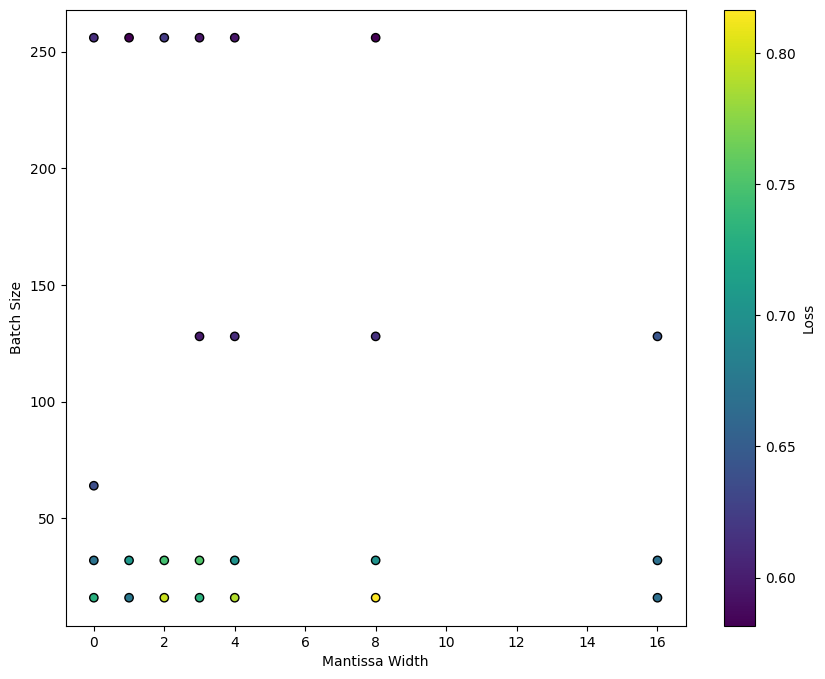

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'results.txt' with the path to your actual CSV file
file_path = 'results.txt'

# Read the CSV file without headers
df = pd.read_csv(file_path, header=None)

# Assign column names
df.columns = ['mantissa_width', 'batchsize', 'lr', 'loss', 'acc', 'norm']

# Calculate the average loss for each combination of mantissa width and batch size
df_avg = df.groupby(['mantissa_width', 'batchsize']).mean().reset_index()

# Extract the data for plotting
mantissa_width = df_avg['mantissa_width']
batchsize = df_avg['batchsize']
loss = df_avg['acc']

# Create a 2D scatter plot with color mapping
plt.figure(figsize=(10, 8))
sc = plt.scatter(mantissa_width, batchsize, c=loss, cmap='viridis', edgecolor='k')

# Add a color bar which maps values to colors
plt.colorbar(sc, label='Loss')

# Labeling the axes
plt.xlabel('Mantissa Width')
plt.ylabel('Batch Size')

# Show the plot
plt.show()


In [4]:

# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.unique(mantissa_width), np.unique(batchsize))
Z = np.zeros(X.shape)

# Fill the Z array with the corresponding loss values
for i in range(df_avg.shape[0]):
    x = df_avg.iloc[i]['mantissa_width']
    y = df_avg.iloc[i]['batchsize']
    z = df_avg.iloc[i]['loss']
    Z[np.where(X == x), np.where(Y == y)] = z

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labeling the axes
ax.set_xlabel('Mantissa Width')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Loss')

# Show the plot
plt.show()

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,2) (2,7) 